In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy import stats
import json

### Ensemble-averaged mean squared displacement (EMSD)

In [2]:
def get_disp_dict_from_file(filename, window, step_size, max_step_size, restriction):

    with open('disp_dict_data/'+filename+'_s{}/'.format(max_step_size)+'disp_dict_'+filename
              +'_w{}_step{}_r{}'.format(window, step_size, restriction), 'r') as f:
        disp_dict = f.read()
    
    return json.loads(disp_dict)

def get_disp_time_dict_from_file(filename, window, step_size, max_step_size, restriction):
    
    with open('disp_dict_data/'+filename+'_s{}/'.format(max_step_size)+'disp_time_dict_'+filename
              +'_w{}_step{}_r{}'.format(window, step_size, restriction), 'r') as f:
        disp_time_dict = f.read()
    
    return json.loads(disp_time_dict)

In [3]:
def get_emsd(disp_dict, disp_time_dict):
    
    max_length = max(len(disps) for disps in disp_dict.values())
    
    all_times = np.array([])
    for t_values in disp_time_dict.values():
        all_times = np.append(all_times, t_values)
    unique_t_values = np.unique(all_times)  
    # at each of these times, we will compute squared displacement averaged over tracks (ensemble average)
    
    emsd_means = np.empty(max_length)
    #emsd_stds = np.empty(max_length)
    emsd_error = np.empty(max_length)
    times = np.empty(max_length)
    
    for i, t in enumerate(unique_t_values):
        # get dictionary of indices where that particular time occurs
        index_dict = {key:times.index(t) for (key,times) in disp_time_dict.items() if t in times}
        keys_to_keep = list(index_dict)  # only keeping tracks that include a point at this particular time
        disps_at_t = np.array([])
        for key in keys_to_keep:
            index = index_dict[key]
            disp_at_t = disp_dict[key][index]
            disps_at_t = np.append(disps_at_t, disp_at_t)
        squared_disps_at_t = np.power(disps_at_t, 2)
    
        temp_mean = np.mean(squared_disps_at_t)
        temp_std = np.std(squared_disps_at_t)
        emsd_means[i] = temp_mean
        #emsd_stds[i] = temp_std
        emsd_error[i] = temp_std/np.sqrt(len(index_dict)-1)
        times[i] = t
        
    return emsd_means[1:], emsd_error[1:], times[1:]

In [4]:
def plot_emsd(filename, window, step_sizes, restriction, step_to_plot=1, errorbar=False):
    
    disp_dict = get_disp_dict_from_file(filename, window, step_to_plot, max(step_sizes), restriction)
    disp_time_dict = get_disp_time_dict_from_file(filename, window, step_to_plot, max(step_sizes), restriction)
    
    emsd_means, emsd_error, times = get_emsd(disp_dict, disp_time_dict)
    
    plt.title(filename)
    plt.xlabel('Time (s)')
    plt.ylabel(r'EMSD ($\mu m^2$)')
    if errorbar:
        plt.errorbar(times, emsd_means, yerr=emsd_error)
    else:
        plt.scatter(times, emsd_means, s=2)

In [5]:
def subplot_emsd_time(filename, window, step_sizes, restriction, pos, errorbar=False, step_to_plot=1):
    """
    """
    i, j = pos
    
    disp_dict = get_disp_dict_from_file(filename, window, step_to_plot, max(step_sizes), restriction)
    disp_time_dict = get_disp_time_dict_from_file(filename, window, step_to_plot, max(step_sizes), restriction)
    emsd_means, emsd_error, times = get_emsd(disp_dict, disp_time_dict)
    
    ax[i,j].set_xlabel('Time (s)')
    ax[i,j].set_ylabel(r'EMSD ($\mu m^2$)')
    ax[i,j].set_title(filename)
    if errorbar:
        ax[i,j].errorbar(times, emsd_means, yerr=emsd_error)
    else:
        ax[i,j].scatter(times, emsd_means, s=2)

In [6]:
filenames = np.array(['Control_frame001-200',
                      'Control_frame200-400',
                      'Control_frame400-600',
                      'Control_frame600-800',
                      'Control_frame800-1000',
                      'Control_frame1000-1200',
                      'LanB1_frame001-200',
                      'LanB1_frame200-400',
                      'LanB1_frame400-600',
                      'LanB1_frame600-800',
                      'LanB1_frame800-1000',
                      'LanB1_frame1000-1200',
                      'defLanB1_300817_frame200-400',
                      'defLanB1_300817_frame400-600'])

In [7]:
window = 20
step_sizes = [1,2,3,4,5,6,7,8]
restriction = 10000

step_to_plot = 1 # no downsampling

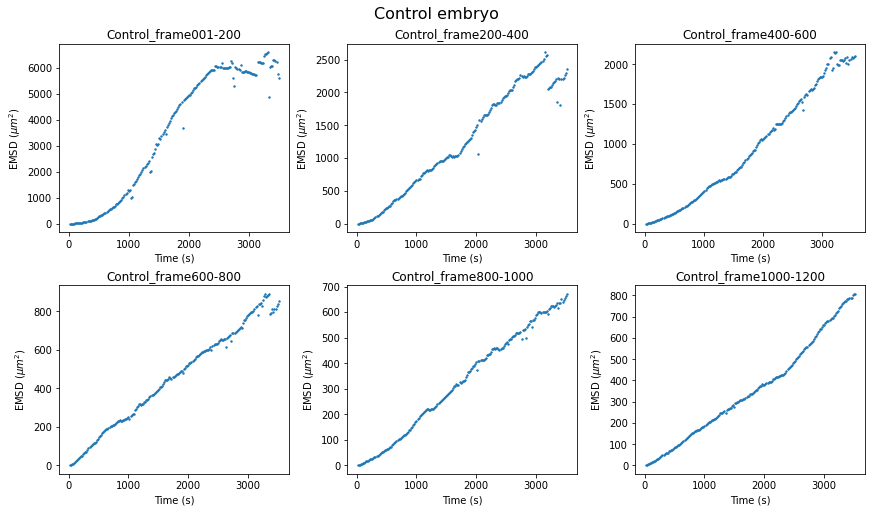

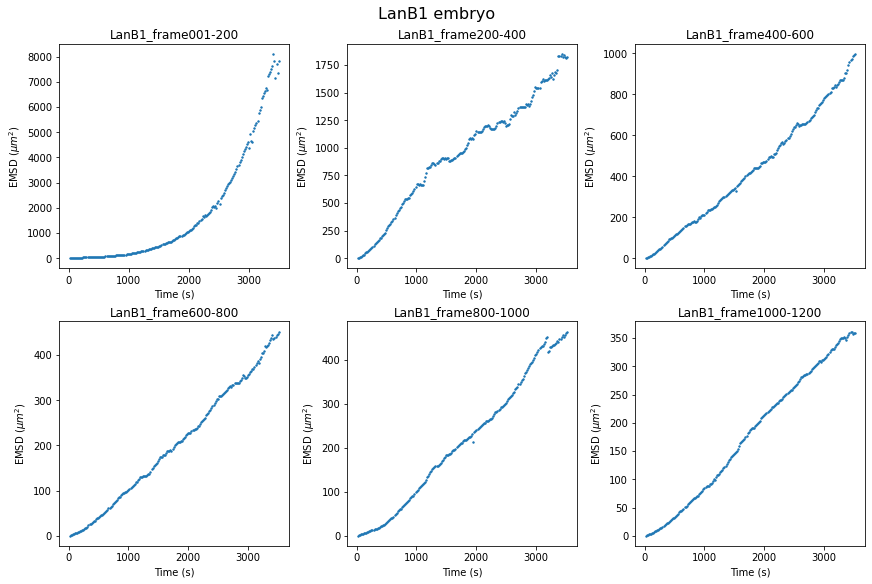

In [8]:
# without errorbars
#Control
fig, ax = plt.subplots(2, 3, figsize=(12, 7), constrained_layout=True)
fig.suptitle("Control embryo", fontsize=16)
for j, f in enumerate(filenames[0:3]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[0,j])
for j, f in enumerate(filenames[3:6]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[1,j])

#Mutant
fig, ax = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)
fig.suptitle("LanB1 embryo", fontsize=16)
#batch1
for j, f in enumerate(filenames[6:9]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[0,j])
for j, f in enumerate(filenames[9:12]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[1,j])

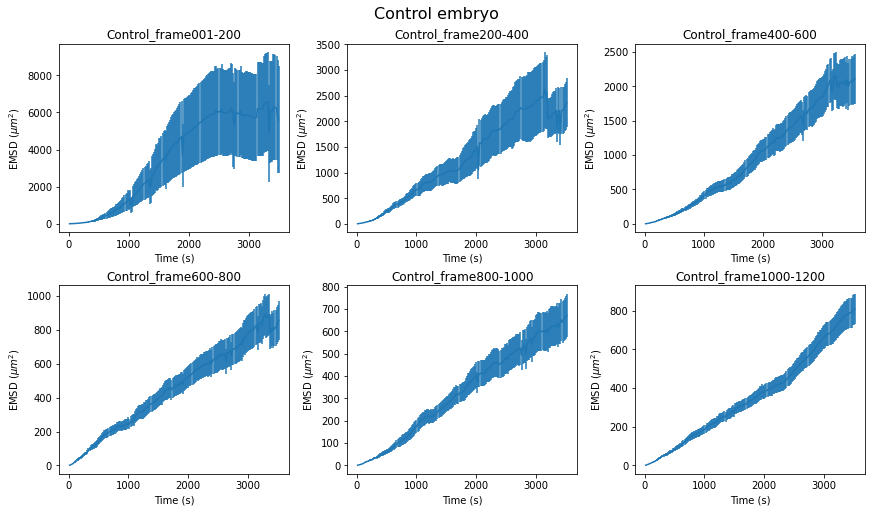

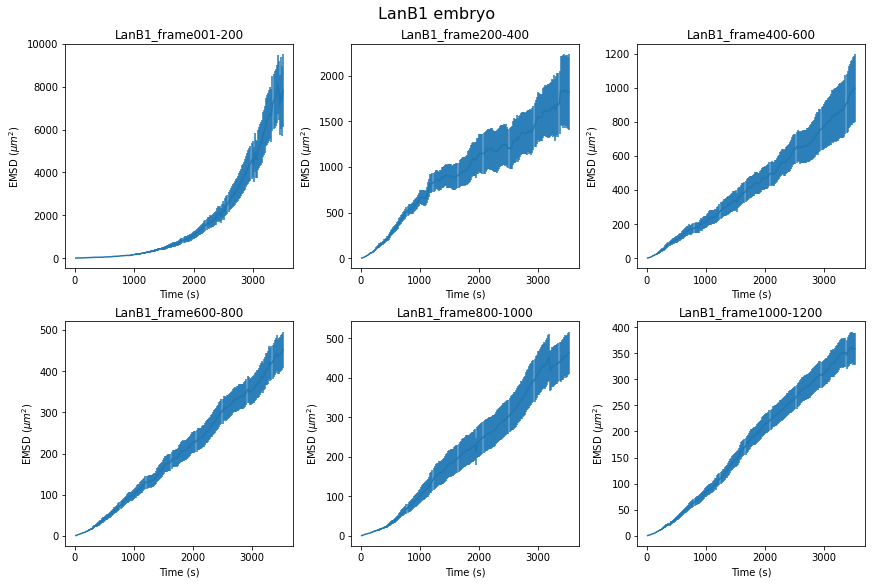

In [9]:
# with errorbars
#Control
fig, ax = plt.subplots(2, 3, figsize=(12, 7), constrained_layout=True)
fig.suptitle("Control embryo", fontsize=16)
for j, f in enumerate(filenames[0:3]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[0,j], errorbar=True)
for j, f in enumerate(filenames[3:6]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[1,j], errorbar=True)

#Mutant
fig, ax = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)
fig.suptitle("LanB1 embryo", fontsize=16)
#batch1
for j, f in enumerate(filenames[6:9]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[0,j], errorbar=True)
for j, f in enumerate(filenames[9:12]):
    subplot_emsd_time(f, window, step_sizes, restriction, pos=[1,j], errorbar=True)

### Time-averaged mean squared displacement (TMSD) and its ensemble average (ETMSD)

Calculated as in: <br>
Arcizet D, Meier B, Sackmann E, Raedler J O and Heinrich D
2008 Phys. Rev. Lett. 101 248103
<br>
$\langle\Delta r^2(\tau)\rangle_t = \langle[x(t+\tau)-x(t)]^2 + [y(t+\tau)-y(t)]^2 + [z(t+\tau)-z(t)]^2\rangle_t$ <br>
$\tau$ is lag time (downsampling time intervals). <br>
The TMSD can be averaged over all the tracks to get the ETMSD.

In [10]:
f = filenames[1]
window = 20
step_sizes = [1,2,3,4,5,6,7,8]
restriction = 10000

def get_etmsd(filename, step_sizes, window, restriction):
    
    etmsd_values = np.empty(len(step_sizes))
    lag_times = np.empty(len(step_sizes))
    
    for i, s in enumerate(step_sizes):
        disp_dict = get_disp_dict_from_file(filename, window, s, max(step_sizes), restriction)
        disp_time_dict = get_disp_time_dict_from_file(filename, window, s, max(step_sizes), restriction)
        
        keys_list = list(disp_dict) # keys are 'TrackID[downsampling start index]'
        
        tdiff_values = np.array([])
        for ds_tid in keys_list:
            times = np.array(disp_time_dict[ds_tid])
            tdiff = times[1:]-times[0:-1]
            tdiff_values = np.append(tdiff_values, tdiff)
        tau = stats.mode(tdiff_values)[0][0]
        lag_times[i] = tau
        
        tmsd_values = np.array([])
        for ds_tid in keys_list:
            disps = np.array(disp_dict[ds_tid])
            squared_disps = np.power(disps,2)
            tmsd_values = np.append(tmsd_values, np.mean(squared_disps)) 
            plt.scatter([tau]*len(tmsd_values), tmsd_values)
        etmsd_values[i] = np.mean(tmsd_values)
        
    return etmsd_values, lag_times
        

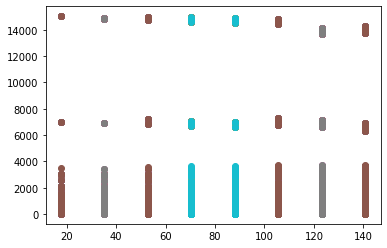

In [11]:
etmsd_values, lag_times = get_etmsd(f, step_sizes, window, restriction)

In [12]:
lag_times

array([ 17.6,  35.2,  52.8,  70.4,  88. , 105.6, 123.2, 140.8])

In [13]:
etmsd_values

array([1269.14326577, 1253.50209589, 1245.8952938 , 1234.32252583,
       1221.56055276, 1216.07139688, 1188.87915997, 1182.19282571])

Text(0, 0.5, 'ETMSD ($\\mu m^2$)')

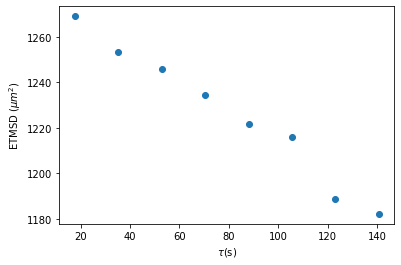

In [14]:
plt.scatter(lag_times, etmsd_values)
plt.xlabel(r'$\tau$(s)')
plt.ylabel(r'ETMSD ($\mu m^2$)')

# Scrap

Old version of get_emsd function which did not take into account that some tracks don't start from time 0:

In [15]:
# def get_emsd(disp_dict, disp_time_dict):
    
#     max_length = max(len(disps) for disps in disp_dict.values())
    
#     emsd_means = np.empty(max_length)
#     #emsd_stds = np.empty(max_length)
#     emsd_error = np.empty(max_length)
#     times = np.empty(max_length)
    
#     for i in range(max_length):
#         temp_disp_dict = {key:disps for (key,disps) in disp_dict.items() if len(disps) > i}
#         temp_time_dict = {key:t for (key,t) in disp_time_dict.items() if len(t) > i}
#         # displ for all tracks at this time
#         squared_disps_at_time = [(disps[i])**2 for disps in temp_disp_dict.values()]
#         temp_mean = np.mean(squared_disps_at_time)
#         temp_std = np.std(squared_disps_at_time)
#         emsd_means[i] = temp_mean
#         #emsd_stds[i] = temp_std
#         emsd_error[i] = temp_std/np.sqrt(len(temp_disp_dict)-1)
        
#         temp_times = [t[i] for t in temp_time_dict.values()]
#         #times[i] = temp_times[0]  # ????????????????????
#         times[i] = np.mean(temp_times)   # ????????????????
#         print([t[i] for t in temp_time_dict.values()]) # ????????????????
        
#     return emsd_means[1:], emsd_error[1:], times[1:]